In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy

%matplotlib inline
plt.rcParams["figure.figsize"] = (4.8, 3.2)


In [2]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 使用 style 来配置 pyplot 风格

style 是 pyplot 的一个子模块，方便进行风格转换， pyplot 有很多的预设风格，可以使用 plt.style.available 来查看：

In [28]:
plt.style.available[0:2]

['Solarize_Light2', '_classic_test_patch']

一般不希望改变全局的风格，使用 context 将风格改变限制在某一个代码块内：

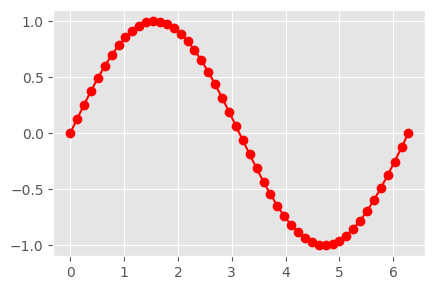

In [5]:
x = np.linspace(0, 2 * np.pi)
y = np.sin(x)
with plt.style.context(("ggplot")):
    plt.plot(x, y, "r-o")
    plt.show()

### x轴的标签45度倾斜

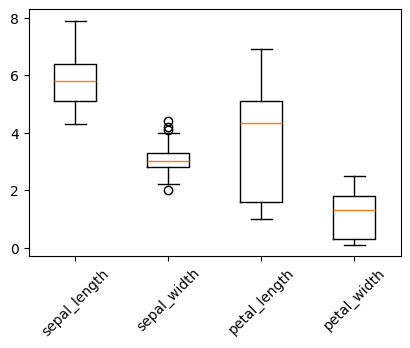

In [10]:
plt.boxplot(iris.drop(["species"], axis=1), tick_labels=iris.columns[:-1])
plt.xticks(rotation=45)
plt.show()

### 用scipy画Q-Q图检测数据分布是否符合某分布分布

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

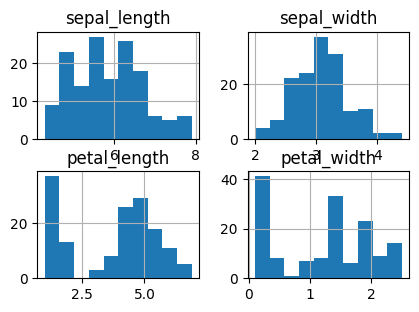

In [4]:
iris.hist()

Q-Q 图通过比较数据和正太分布的**分位数**是否相等来判断数据是否服从正太分布。如下图蓝色的点与红色的线越近，说明数据更符合正太分布。

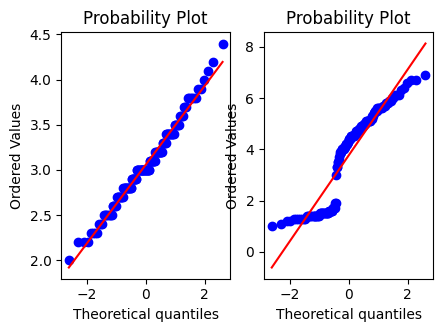

In [27]:
plt.subplot(1, 2, 1)
scipy.stats.probplot(iris["sepal_width"], dist="norm", plot=plt)
plt.subplot(1, 2, 2)
scipy.stats.probplot(iris["petal_length"], dist="norm", plot=plt)
plt.show()

### 绘制数据的相关图

<Axes: >

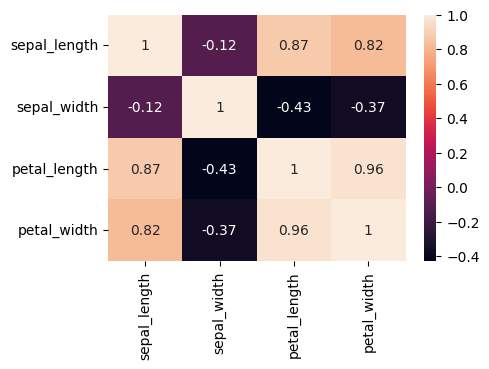

In [4]:
cor = iris.drop("species", axis=1).corr()
sns.heatmap(cor, annot=True)